In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
import os
import requests
from sklearn.linear_model import LogisticRegression

In [2]:
url = 'https://lazyprogrammer.me/course_files/AirlineTweets.csv'
r = requests.get(url, allow_redirects=True)

from io import StringIO
data = StringIO(r.text)
df=pd.read_csv(data,encoding='ISO-8859-1')

In [3]:
np.random.seed(1)

In [4]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [5]:
df1=df[['airline_sentiment','text']].copy()

In [6]:
df1.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

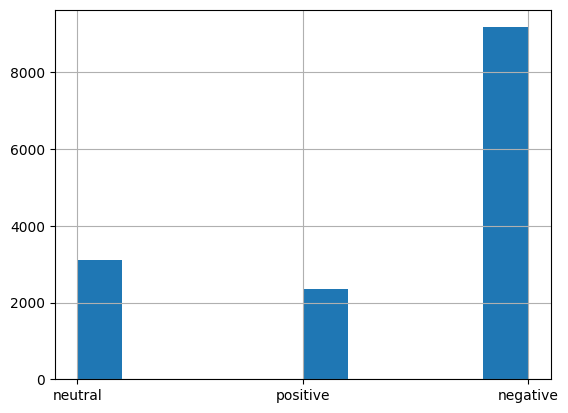

In [7]:
df['airline_sentiment'].hist()

In [8]:
target_map={'positive':1,'negative':0,'neutral':2}
df1['target']=df1['airline_sentiment'].map(target_map)

In [9]:
df1.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [10]:
df_train,df_test=train_test_split(df1)

In [11]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [12]:
vectorizer=TfidfVectorizer(max_features=2000)

In [13]:
x_train=vectorizer.fit_transform(df_train['text'])
x_train

<10980x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 157739 stored elements in Compressed Sparse Row format>

In [14]:
x_test=vectorizer.transform(df_test['text'])
x_test

<3660x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 52187 stored elements in Compressed Sparse Row format>

In [15]:
y_train=df_train['target']
y_test=df_test['target']

In [16]:
model=LogisticRegression(max_iter=500)
model.fit(x_train,y_train)

print('train acc :',model.score(x_train,y_train))
print('test acc :',model.score(x_test,y_test))

train acc : 0.8543715846994535
test acc : 0.7978142076502732


In [17]:
pr_train=model.predict_proba(x_train)
pr_test=model.predict_proba(x_test)

In [18]:
print('train auc:',roc_auc_score(y_train,pr_train,multi_class='ovo'))
print('test auc:',roc_auc_score(y_test,pr_test,multi_class='ovo'))

train auc: 0.9431363218237362
test auc: 0.8950635389575069


In [19]:
ptrain=model.predict(x_train)
ptest=model.predict(x_test)

In [20]:
cm=confusion_matrix(y_train,ptrain,normalize='true')
cm

array([[0.96500653, 0.00813126, 0.0268622 ],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30408602, 0.0516129 , 0.64430108]])

In [21]:
model.coef_

array([[ 0.4033617 ,  0.34955144,  0.11150076, ...,  0.28310767,
         0.92213937, -0.69798469],
       [-0.196356  , -0.23797743, -0.13574704, ...,  0.10186109,
        -0.32750427,  0.17572874],
       [-0.2070057 , -0.11157401,  0.02424628, ..., -0.38496876,
        -0.59463511,  0.52225595]])

(array([  1.,   1.,   0.,   0.,   0.,   0.,   2.,   3.,   2.,   1.,   3.,
          9.,  23.,  52., 171., 290., 403., 392., 315., 166.,  88.,  32.,
         16.,  12.,   6.,   3.,   3.,   2.,   1.,   3.]),
 array([-4.36934367, -4.10885128, -3.84835889, -3.58786649, -3.3273741 ,
        -3.0668817 , -2.80638931, -2.54589691, -2.28540452, -2.02491213,
        -1.76441973, -1.50392734, -1.24343494, -0.98294255, -0.72245016,
        -0.46195776, -0.20146537,  0.05902703,  0.31951942,  0.58001181,
         0.84050421,  1.1009966 ,  1.361489  ,  1.62198139,  1.88247378,
         2.14296618,  2.40345857,  2.66395097,  2.92444336,  3.18493575,
         3.44542815]),
 <BarContainer object of 30 artists>)

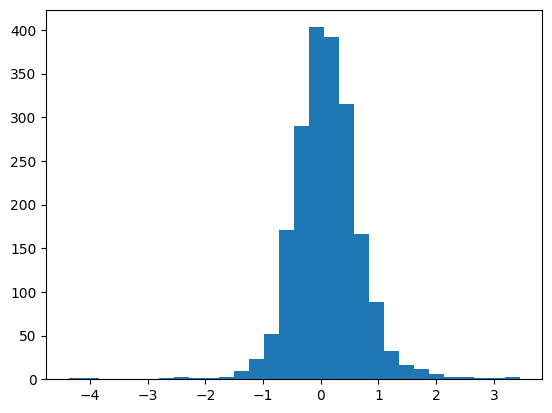

In [22]:
plt.hist(model.coef_[0],bins=30)

In [23]:
word_index_map=vectorizer.vocabulary_
word_index_map

{'united': 1842,
 'change': 348,
 'made': 1088,
 'in': 931,
 'just': 983,
 'over': 1267,
 'hours': 901,
 'for': 753,
 'something': 1616,
 'that': 1730,
 'should': 1571,
 'have': 849,
 'taken': 1704,
 'online': 1243,
 'am': 139,
 'not': 1210,
 'loved': 1077,
 'the': 1732,
 'agent': 110,
 'though': 1748,
 'door': 567,
 'to': 1768,
 'half': 830,
 'into': 952,
 'plane': 1331,
 'seat': 1535,
 'be': 245,
 'forced': 754,
 'always': 138,
 'sit': 1587,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1262,
 'of': 1224,
 'delayed': 503,
 'flights': 734,
 'you': 1991,
 'suck': 1675,
 'and': 149,
 'getting': 798,
 'worse': 1967,
 'fair': 671,
 'usairways': 1862,
 'stuck': 1670,
 'need': 1189,
 'reflight': 1440,
 'booking': 278,
 'problems': 1378,
 'next': 1197,
 'flight': 723,
 'possibly': 1358,
 'dm': 553,
 'more': 1167,
 'info': 940,
 '30': 38,
 'departure': 518,
 'sure': 1689,
 'is': 956,
 'there': 1736,
 'catering': 334,
 'at': 197,
 'jfk': 977,
 'http': 908,
 'co': 389,
 'southwestair': 1

In [24]:
model.coef_[0][1]

0.3495514375623493

In [26]:
threshold=2
print('most positive words:')
for word,index in word_index_map.items():
    weight=model.coef_[0][index]
    if weight<-threshold:
        print(word,weight)

most positive words:
southwestair -2.364319553028937
thank -4.3693436734169815
thanks -3.9837084247450028
great -2.137856111631422
virginamerica -2.5953299990239445
jetblue -2.52647410765074
love -2.556759039429033
amazing -2.4269421333773833
worries -2.186496772982702
